In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [3]:
dataset_train = pd.read_csv('trainset (3).csv')
dataset_train.columns
dataset_train.head()
train_set = dataset_train.iloc[:,1:2].values
type(train_set)
train_set.shape

(1259, 1)

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape

(1259, 1)

In [5]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [6]:
X_train.shape
length = 60
n_features = 1

In [12]:
model = Sequential()
model.add(layers.SimpleRNN(50, input_shape = (length, n_features)))
model.add(layers.Dense(1))

In [13]:
model.compile(optimizer = "adam", loss = "mse")

In [15]:
print("NAME: AMURTHA VAAHINI.KN  \nREGISTER NUMBER: 212222240008 \n        ")
model.summary()


NAME: AMURTHA VAAHINI.KN  
REGISTER NUMBER: 212222240008 
        
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(X_train1,y_train,epochs=30, batch_size=15)

Epoch 1/30
80/80 [==============================] - 2s 11ms/step - loss: 0.0067
Epoch 2/30
80/80 [==============================] - 1s 12ms/step - loss: 4.9754e-04
Epoch 3/30
80/80 [==============================] - 1s 15ms/step - loss: 4.9516e-04
Epoch 4/30
80/80 [==============================] - 1s 15ms/step - loss: 4.7140e-04
Epoch 5/30
80/80 [==============================] - 2s 22ms/step - loss: 3.7111e-04
Epoch 6/30
80/80 [==============================] - 2s 19ms/step - loss: 3.7339e-04
Epoch 7/30
80/80 [==============================] - 1s 11ms/step - loss: 3.7758e-04
Epoch 8/30
80/80 [==============================] - 1s 11ms/step - loss: 3.2531e-04
Epoch 9/30
80/80 [==============================] - 1s 11ms/step - loss: 2.9580e-04
Epoch 10/30
80/80 [==============================] - 1s 11ms/step - loss: 2.9790e-04
Epoch 11/30
80/80 [==============================] - 1s 11ms/step - loss: 2.6830e-04
Epoch 12/30
80/80 [==============================] - 1s 11ms/step - loss: 3.16

In [18]:
dataset_test = pd.read_csv('testset (2).csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [19]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [20]:
X_test.shape

(1324, 60, 1)

In [21]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 0s 5ms/step


NAME: AMURTHA VAAHINI.KN 
REGISTER NUMBER: 212222240008
 


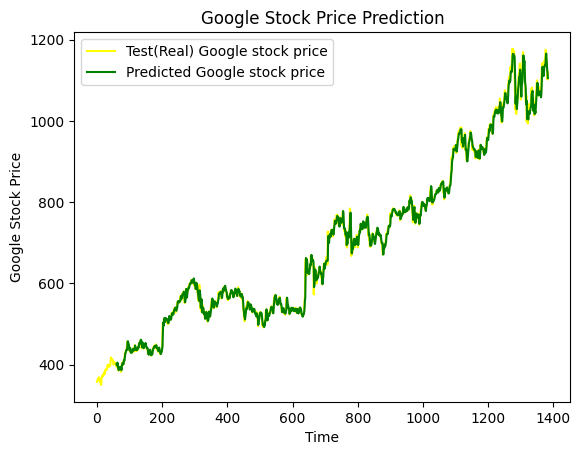

In [22]:
print("NAME: AMURTHA VAAHINI.KN \nREGISTER NUMBER: 212222240008\n ")
plt.plot(np.arange(0,1384),inputs, color='yellow', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='green', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()